In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import num2date

In [13]:
ds_obs = xr.open_dataset('GPS-RO_zonmean.nc')
ds_era5 = xr.open_dataset('FULL-ERA5.tp.monzonmean.2000-2018.nc4')
ds_erai = xr.open_dataset('erai.tp.monmean.zm.nc')

In [42]:
era5_sl = ds_era5.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
erai_sl = ds_erai.sel(lat=slice(20,-20), time=slice('2007-01-01', '2018-12-31'))

obs_sl = ds_obs.resample(time='M').mean()
obs_l = obs_sl.sel(lat=slice(-20,20))

In [46]:
era5_tmean = era5_sl.ctpt[:,:].mean(axis=0)
erai_tmean = erai_sl.ctpt[:,:].mean(axis=0)
gpsro_tmean = obs_l.CP_T[:,:].mean(axis=0)

In [57]:
era5_tmean

<xarray.DataArray 'ctpt' (lat: 41)>
array([195.1681 , 194.60709, 194.10439, 193.65628, 193.26228, 192.91731,
       192.61774, 192.3571 , 192.12976, 191.93196, 191.75995, 191.60933,
       191.47745, 191.36194, 191.26173, 191.17653, 191.1063 , 191.05064,
       191.00845, 190.98038, 190.968  , 190.97066, 190.98895, 191.02242,
       191.07106, 191.13226, 191.2069 , 191.29205, 191.3899 , 191.5034 ,
       191.63547, 191.78989, 191.96909, 192.17659, 192.41524, 192.6838 ,
       192.98338, 193.3172 , 193.68784, 194.09637, 194.54405],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0

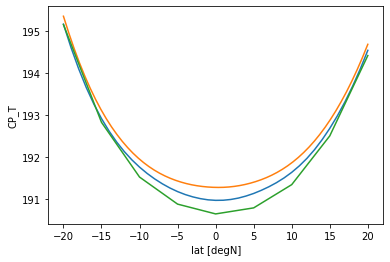

In [50]:
era5_tmean.plot()
erai_tmean.plot()
gpsro_tmean.plot()

In [65]:
e5_obs_ctpt= era5_sl.ctpt[:,:].mean(axis=0) - obs_sl.CP_T[:,:].mean(axis=(0))
ei_obs_ctpt = erai_sl.ctpt[:,:].mean(axis=0) - obs_sl.CP_T[:,:].mean(axis=(0))

(-0.2, 2)

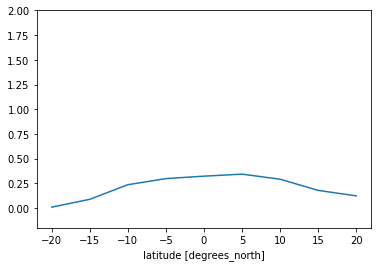

In [66]:
e5_obs_ctpt.plot()
#ei_obs_ctpt.plot()
plt.ylim(-0.2,2)